In [1]:
import os
import sys
import struct
import pprint
import matplotlib
import matplotlib.pyplot as plt
import pickle
import math
import time
import statistics
import numpy as np
from TraceInc import AutoDict
%pylab inline

type_enum = {
   0 : "Load",
   1 : "Store"
}
pp = pprint.PrettyPrinter(indent=2)

Populating the interactive namespace from numpy and matplotlib


In [5]:
def comRegularity(tmap):
    kSet = AutoDict()
    reg = AutoDict()
    recvSet = []
    for sk in tmap:
        for cta in tmap[sk]:
            for sit in tmap[sk][cta]:
                if not kSet[sk][sit][cta]:
                    kSet[sk][sit][cta] = []
                for rk in tmap[sk][cta][sit]:
                    #for rcta in sorted(tmap[sk][cta][sit][rk]):
                     #recvSet.append(rcta)
                    #a = frozenset(recvSet.copy())
                    kSet[sk][sit][cta].append(len(tmap[sk][cta][sit][rk].keys()))
                    #recvSet.clear()
    
    for sk in kSet:
        for it in kSet[sk]:
            for scta in kSet[sk][it]:
                if not reg[it]:
                    reg[it] = []
                #reg[it].append(len(set(kSet[sk][it][scta])))
                reg[it].extend(kSet[sk][it][scta])

    return reg

In [3]:
files = ['hist', 'hs3d','hs2d', 'nbody', 'path', 'bfs']

In [6]:
vols = {}
mean = {}
err  = {}
for app in files:
    data = pickle.load( open('../data/'+app+'.transfermap', "rb"))
    vols[app] = comRegularity(data)

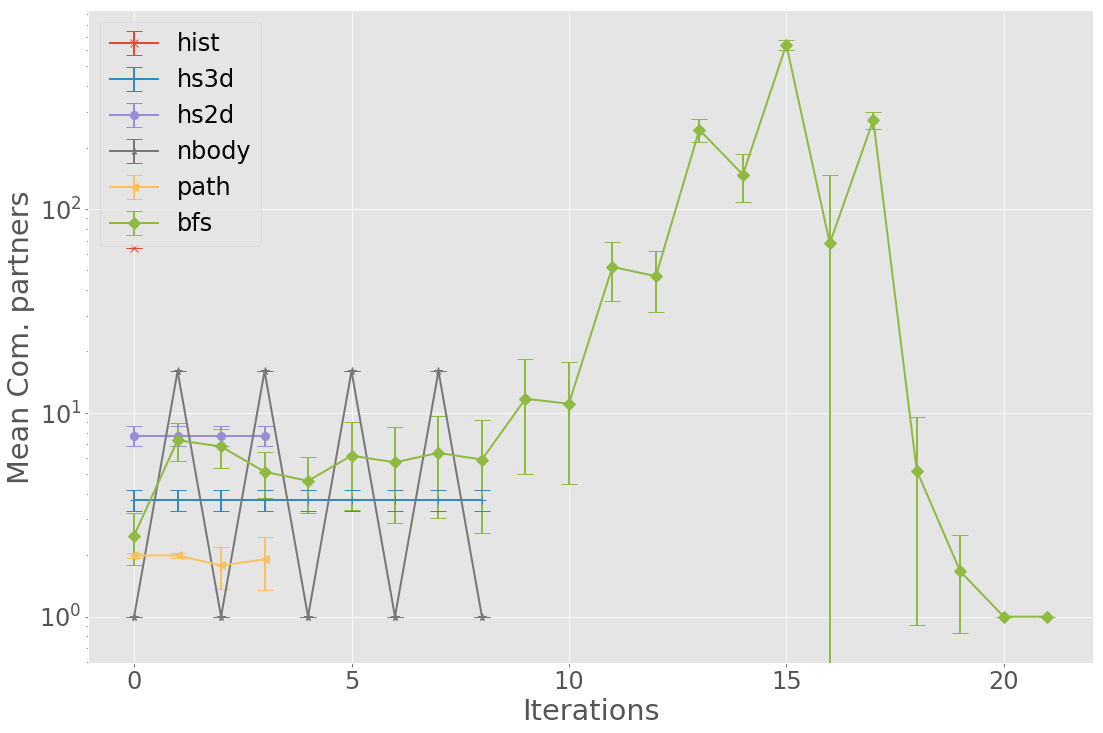

In [24]:
plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (18, 12)
matplotlib.rcParams.update({'font.size': 24})
symbols = ["x", '+', 'o', '*', '<', 'D']

for (inx,app) in enumerate(files):
    mean = []
    stddev =[]
    for it in sorted(list(vols[app].keys())):
        mean.append(statistics.mean(vols[app][it]))
        stddev.append(statistics.stdev(vols[app][it]))
    plt.errorbar(y=mean, x=sorted(list(vols[app].keys())), yerr=stddev, fmt="-"+symbols[inx],label=app, alpha=1, markersize=8, linewidth=2, capsize=8)
plt.ylabel('Mean Com. partners')
plt.xlabel('Iterations')
#plt.title('com/data ration (write)')
plt.legend(loc=2)
plt.yscale('log')

filename = '../plots/transmission-regularity.pdf'
plt.savefig(filename, papertype='a4', bbox_inches='tight', orientation='landscape')
plt.show()